## Vamos a comparar el modelo supervisado Random Forest con el modelo no supervisado kMeans con PCA.

Silhouette Score para KMeans: 0.41857878333990184


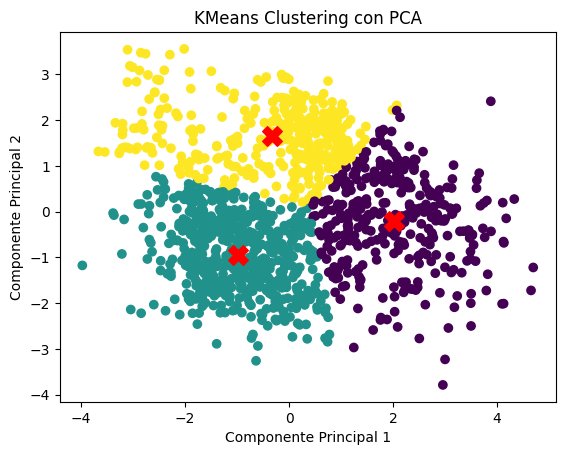

Evaluación Random Forest con los mejores parámetros:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       194
           1       0.71      0.65      0.68       187
           2       0.58      0.53      0.55       195

    accuracy                           0.69       576
   macro avg       0.69      0.69      0.69       576
weighted avg       0.69      0.69      0.69       576



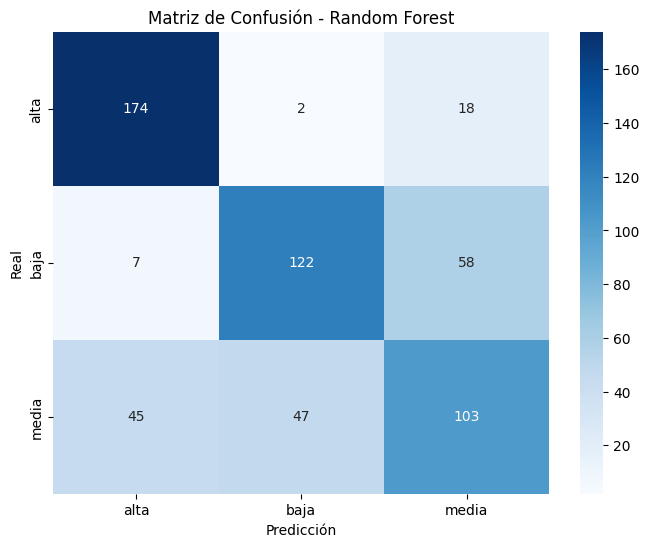

Silhouette Score de KMeans: 0.41857878333990184
Métricas de clasificación Random Forest:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       194
           1       0.71      0.65      0.68       187
           2       0.58      0.53      0.55       195

    accuracy                           0.69       576
   macro avg       0.69      0.69      0.69       576
weighted avg       0.69      0.69      0.69       576



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, silhouette_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Paso 1: Cargar el archivo CSV
df = pd.read_csv('../data/processed/vinotinto.csv')

# Paso 2: Preprocesamiento de datos
# Asumimos que 'quality_label' es la columna objetivo y las demás columnas son características
label_encoder = LabelEncoder()
df['quality_label_encoded'] = label_encoder.fit_transform(df['quality_label'])

# Definir las características (X) y la variable objetivo (y)
X = df.drop(['quality', 'quality_label', 'quality_label_encoded'], axis=1)
y = df['quality_label_encoded']

# Paso 3: Balanceo de clases con SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Paso 4: Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Paso 5: Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paso 6: Entrenar KMeans con PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Aplicar KMeans con 3 clusters 
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

# Obtener las predicciones de los clusters
y_kmeans = kmeans.predict(X_pca)

# Evaluar la calidad del clustering usando el Silhouette Score
silhouette_avg_kmeans = silhouette_score(X_pca, y_kmeans)
print(f"Silhouette Score para KMeans: {silhouette_avg_kmeans}")

# Visualizar el clustering con KMeans en PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')  # Colorear según el cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')  # Centro de los clusters
plt.title("KMeans Clustering con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

# Paso 7: Entrenar el modelo Random Forest
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_scaled, y_train)

# Predecir con el modelo Random Forest
y_pred_rf = rf.predict(X_test_scaled)

# Evaluar el rendimiento de Random Forest
print("Evaluación Random Forest con los mejores parámetros:")
print(classification_report(y_test, y_pred_rf))

# Matriz de Confusión para Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Paso 8: Comparación entre KMeans y Random Forest
# Evaluación de KMeans (Silhouette Score)
print(f"Silhouette Score de KMeans: {silhouette_avg_kmeans}")

# Evaluación de Random Forest (classification report)
print("Métricas de clasificación Random Forest:")
print(classification_report(y_test, y_pred_rf))


nos decantamos por el random forest

Evaluación Random Forest con los mejores parámetros:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       194
           1       0.75      0.72      0.74       187
           2       0.63      0.57      0.60       195

    accuracy                           0.73       576
   macro avg       0.73      0.73      0.73       576
weighted avg       0.73      0.73      0.73       576



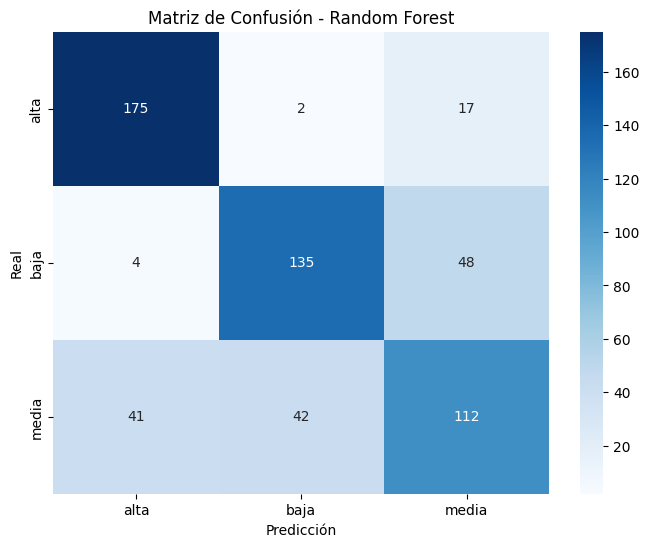

Accuracy: 0.7326388888888888


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 1: Entrenar el modelo con los mejores parámetros encontrados (usando GridSearchCV o RandomizedSearchCV)
# Si ya tienes best_rf, puedes continuar con este modelo entrenado.
rf = RandomForestClassifier(class_weight='balanced', random_state=42, 
                            n_estimators=1000, max_depth=20)  # Usa los mejores parámetros aquí
rf.fit(X_train_scaled, y_train)  # Entrenar con los datos escalados

# Paso 2: Realizar predicciones con el conjunto de prueba
y_pred_rf = rf.predict(X_test_scaled)

# Paso 3: Evaluar el rendimiento del modelo con métricas como classification_report
print("Evaluación Random Forest con los mejores parámetros:")
print(classification_report(y_test, y_pred_rf))

# Paso 4: Matriz de Confusión para Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Paso 5: Analizar las métricas
print(f"Accuracy: {rf.score(X_test_scaled, y_test)}")


Evaluación Random Forest con los mejores parámetros:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       194
           1       0.75      0.72      0.74       187
           2       0.63      0.57      0.60       195

    accuracy                           0.73       576
   macro avg       0.73      0.73      0.73       576
weighted avg       0.73      0.73      0.73       576



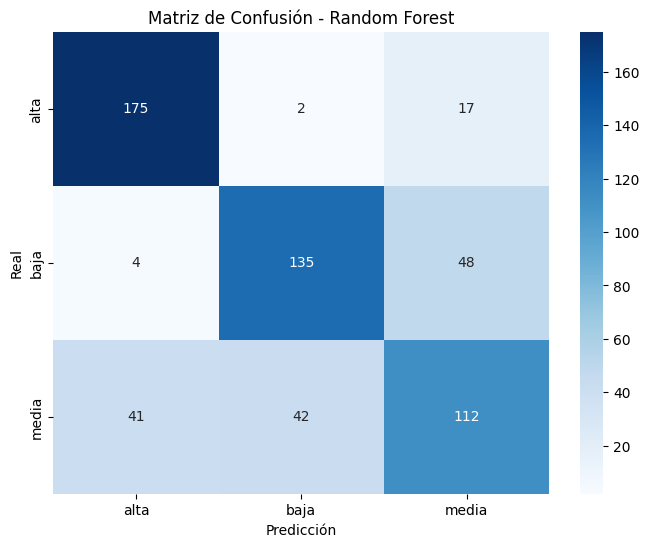

Accuracy: 0.7326388888888888


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Paso 1: Cargar el archivo CSV
# Asegúrate de que el archivo esté en la ruta correcta
df = pd.read_csv('../data/processed/vinotinto.csv')

# Paso 2: Preprocesamiento de datos
# Asumimos que 'quality_label' es la columna objetivo y las demás columnas son características
label_encoder = LabelEncoder()
df['quality_label_encoded'] = label_encoder.fit_transform(df['quality_label'])

# Definir las características (X) y la variable objetivo (y)
X = df.drop(['quality', 'quality_label', 'quality_label_encoded'], axis=1)
y = df['quality_label_encoded']

# Paso 3: Balanceo de clases con SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Paso 4: Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Paso 5: Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paso 6: Entrenamiento del modelo Random Forest
# Crear el modelo de Random Forest con los mejores parámetros encontrados
rf = RandomForestClassifier(n_estimators=1000, max_depth=20, class_weight='balanced', random_state=42)
rf.fit(X_train_scaled, y_train)

# Paso 7: Realizar predicciones con el conjunto de prueba
y_pred_rf = rf.predict(X_test_scaled)

# Paso 8: Evaluar el rendimiento de Random Forest
print("Evaluación Random Forest con los mejores parámetros:")
print(classification_report(y_test, y_pred_rf))

# Paso 9: Matriz de Confusión para Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Paso 10: Analizar el rendimiento general
accuracy_rf = rf.score(X_test_scaled, y_test)
print(f"Accuracy: {accuracy_rf}")

# Paso 11: Guardar el modelo entrenado (opcional)
# import joblib
# joblib.dump(rf, 'random_forest_model.pkl')  # Guardar el modelo en un archivo



## Script con SMOTE + Validación Cruzada:

Validación Cruzada (Accuracy): [0.70052083 0.6328125  0.6796875  0.671875   0.77083333]
Promedio de Accuracy: 0.6911458333333333
Evaluación Random Forest con SMOTE y Validación Cruzada:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       640
           1       1.00      1.00      1.00       640
           2       1.00      1.00      1.00       640

    accuracy                           1.00      1920
   macro avg       1.00      1.00      1.00      1920
weighted avg       1.00      1.00      1.00      1920



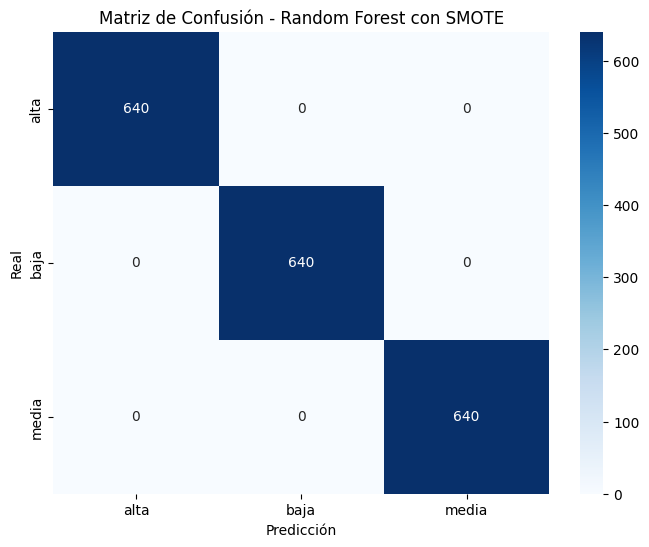

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Paso 1: Cargar el archivo CSV
df = pd.read_csv('../data/processed/vinotinto.csv')

# Paso 2: Preprocesamiento de datos
label_encoder = LabelEncoder()
df['quality_label_encoded'] = label_encoder.fit_transform(df['quality_label'])

# Definir las características (X) y la variable objetivo (y)
X = df.drop(['quality', 'quality_label', 'quality_label_encoded'], axis=1)
y = df['quality_label_encoded']

# Paso 3: Balanceo de clases con SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Paso 4: Escalar las características
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)

# Paso 5: Entrenar el modelo Random Forest
rf = RandomForestClassifier(n_estimators=1000, max_depth=20, class_weight='balanced', random_state=42)

# Paso 6: Validación Cruzada
cv_scores = cross_val_score(rf, X_res_scaled, y_res, cv=5, scoring='accuracy')  # 5-fold cross-validation
print(f"Validación Cruzada (Accuracy): {cv_scores}")
print(f"Promedio de Accuracy: {cv_scores.mean()}")

# Paso 7: Entrenamiento final con todo el conjunto balanceado
rf.fit(X_res_scaled, y_res)

# Paso 8: Predicciones con el conjunto de prueba
y_pred_rf = rf.predict(X_res_scaled)

# Paso 9: Evaluación de Random Forest
print("Evaluación Random Forest con SMOTE y Validación Cruzada:")
print(classification_report(y_res, y_pred_rf))

# Paso 10: Matriz de Confusión para Random Forest
cm_rf = confusion_matrix(y_res, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusión - Random Forest con SMOTE")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


Validación Cruzada (Accuracy): [0.69010417 0.61458333 0.671875   0.6484375  0.73697917]
Promedio de Accuracy: 0.6723958333333333
Evaluación Random Forest con SMOTE y Validación Cruzada:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       640
           1       0.96      0.97      0.96       640
           2       0.96      0.92      0.94       640

    accuracy                           0.96      1920
   macro avg       0.96      0.96      0.96      1920
weighted avg       0.96      0.96      0.96      1920



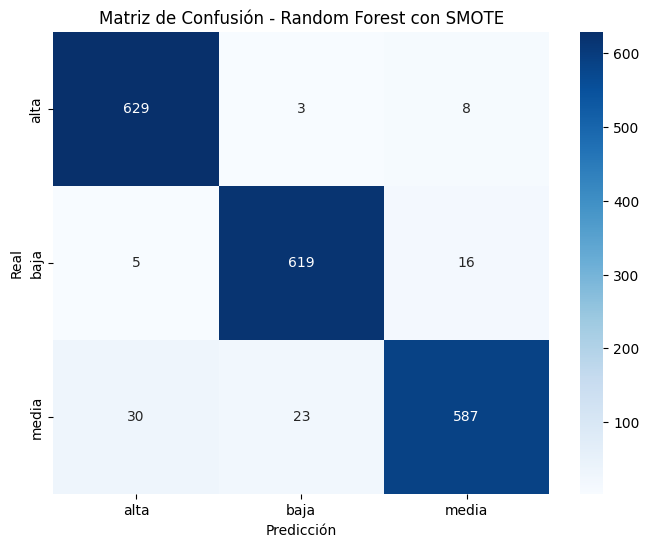

In [6]:
# Ajustar parámetros para evitar el sobreajuste
rf = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)

# Entrenar el modelo con los datos balanceados por SMOTE
rf.fit(X_res_scaled, y_res)

# Evaluar el rendimiento del modelo
cv_scores = cross_val_score(rf, X_res_scaled, y_res, cv=5, scoring='accuracy')
print(f"Validación Cruzada (Accuracy): {cv_scores}")
print(f"Promedio de Accuracy: {cv_scores.mean()}")

# Predicciones con el conjunto de prueba
y_pred_rf = rf.predict(X_res_scaled)

# Evaluación del modelo
print("Evaluación Random Forest con SMOTE y Validación Cruzada:")
print(classification_report(y_res, y_pred_rf))

# Matriz de Confusión para Random Forest
cm_rf = confusion_matrix(y_res, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusión - Random Forest con SMOTE")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


## Script con class_weight='balanced' + Validación Cruzada:

Validación Cruzada (Accuracy): [0.65968586 0.64736842 0.6        0.55789474 0.59473684]
Promedio de Accuracy: 0.611937172774869
Evaluación Random Forest con `class_weight='balanced'` y Validación Cruzada:
              precision    recall  f1-score   support

           0       0.62      0.43      0.51        54
           1       0.75      0.76      0.75       190
           2       0.60      0.65      0.62       164

    accuracy                           0.67       408
   macro avg       0.65      0.61      0.63       408
weighted avg       0.67      0.67      0.67       408



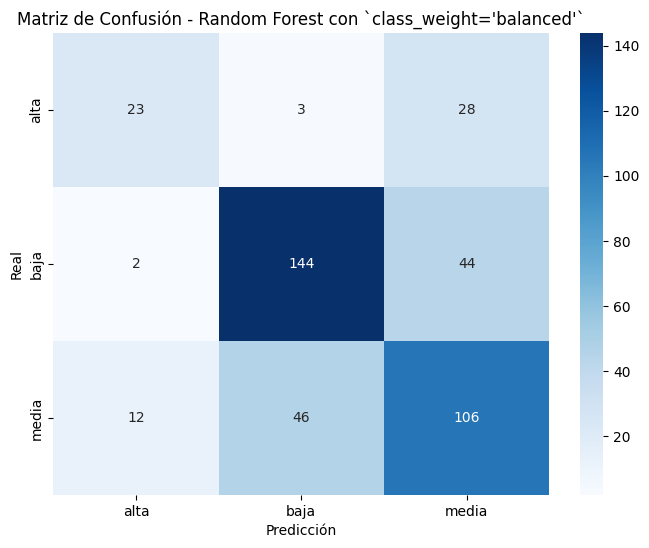

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 1: Cargar el archivo CSV
df = pd.read_csv('../data/processed/vinotinto.csv')

# Paso 2: Preprocesamiento de datos
label_encoder = LabelEncoder()
df['quality_label_encoded'] = label_encoder.fit_transform(df['quality_label'])

# Definir las características (X) y la variable objetivo (y)
X = df.drop(['quality', 'quality_label', 'quality_label_encoded'], axis=1)
y = df['quality_label_encoded']

# Paso 3: Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Paso 4: Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paso 5: Entrenar el modelo Random Forest con balanceo de clases
rf = RandomForestClassifier(n_estimators=1000, max_depth=20, class_weight='balanced', random_state=42)

# Paso 6: Validación Cruzada
cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
print(f"Validación Cruzada (Accuracy): {cv_scores}")
print(f"Promedio de Accuracy: {cv_scores.mean()}")

# Paso 7: Entrenamiento final con el conjunto de entrenamiento
rf.fit(X_train_scaled, y_train)

# Paso 8: Predicciones con el conjunto de prueba
y_pred_rf = rf.predict(X_test_scaled)

# Paso 9: Evaluación de Random Forest
print("Evaluación Random Forest con `class_weight='balanced'` y Validación Cruzada:")
print(classification_report(y_test, y_pred_rf))

# Paso 10: Matriz de Confusión para Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusión - Random Forest con `class_weight='balanced'`")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


_____________

Evaluación Random Forest con los mejores parámetros:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       194
           1       0.75      0.72      0.74       187
           2       0.63      0.57      0.60       195

    accuracy                           0.73       576
   macro avg       0.73      0.73      0.73       576
weighted avg       0.73      0.73      0.73       576



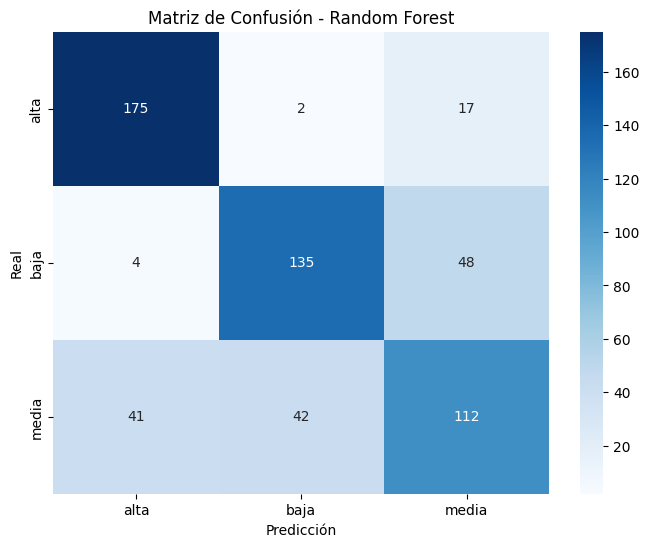

Accuracy: 0.7326388888888888


['random_forest_model.pkl']

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Paso 1: Cargar el archivo CSV
# Asegúrate de que el archivo esté en la ruta correcta
df = pd.read_csv('../data/processed/vinotinto.csv')

# Paso 2: Preprocesamiento de datos
# Asumimos que 'quality_label' es la columna objetivo y las demás columnas son características
label_encoder = LabelEncoder()
df['quality_label_encoded'] = label_encoder.fit_transform(df['quality_label'])

# Definir las características (X) y la variable objetivo (y)
X = df.drop(['quality', 'quality_label', 'quality_label_encoded'], axis=1)
y = df['quality_label_encoded']

# Paso 3: Balanceo de clases con SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Paso 4: Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Paso 5: Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paso 6: Entrenamiento del modelo Random Forest
# Crear el modelo de Random Forest con los mejores parámetros encontrados
rf = RandomForestClassifier(n_estimators=1000, max_depth=20, class_weight='balanced', random_state=42)
rf.fit(X_train_scaled, y_train)

# Paso 7: Realizar predicciones con el conjunto de prueba
y_pred_rf = rf.predict(X_test_scaled)

# Paso 8: Evaluar el rendimiento de Random Forest
print("Evaluación Random Forest con los mejores parámetros:")
print(classification_report(y_test, y_pred_rf))

# Paso 9: Matriz de Confusión para Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Paso 10: Analizar el rendimiento general
accuracy_rf = rf.score(X_test_scaled, y_test)
print(f"Accuracy: {accuracy_rf}")

# Paso 11: Guardar el modelo entrenado (opcional)
import joblib
joblib.dump(rf, 'random_forest_model.pkl')  # Guardar el modelo en un archivo

